In [205]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


In [2]:
train = pd.read_csv("train_kOBLwZA.csv")
test = pd.read_csv("test_t02dQwI.csv")

In [18]:
sample = pd.read_csv("SampleSubmission_TmnO39y (1).txt")

In [19]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN
5,FDH56,OUT046,NaN
6,FDL48,OUT018,NaN
7,FDC48,OUT027,NaN
8,FDN33,OUT045,NaN
9,FDA36,OUT017,NaN


In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
train.shape

(8523, 12)

In [8]:
test.shape

(5681, 11)

In [12]:
df = pd.concat([train,test],axis = "index")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [13]:
df.shape

(14204, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [17]:
df.describe(include = "all")

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4
top,Low Fat,DRF01,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN


In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [23]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [26]:
df["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"},
                              inplace= True)


In [27]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
df["Item_Identifier"].nunique()

1559

In [38]:
df["Item_Identifier_type"] = df["Item_Identifier"].apply(lambda x : x[:2])

In [40]:
df["Item_MRP"].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [42]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [44]:
df["Item_Visibility"].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [45]:
df["Item_Visibility"].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [46]:
visibility = df["Item_Visibility"] 

In [50]:
df.loc[df["Item_Visibility"]==0.000000,"Item_Visibility"] = np.NAN

In [51]:
df["Item_Visibility"].isna().sum()

879

In [53]:
df["Item_Visibility"].fillna(0.000000, inplace=True)

In [54]:
df["Item_Weight"].isna().sum()

2439

In [58]:
df["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
7          NaN
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
18         NaN
19      13.350
20      18.850
21         NaN
22      14.600
23         NaN
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
29         NaN
         ...  
5651     9.500
5652     6.650
5653     6.760
5654     7.275
5655       NaN
5656       NaN
5657    16.200
5658    15.600
5659     5.000
5660     9.800
5661       NaN
5662     9.800
5663    16.200
5664    13.000
5665       NaN
5666     9.300
5667     9.395
5668    15.600
5669       NaN
5670    10.395
5671    15.000
5672     6.860
5673     7.070
5674    15.700
5675    13.000
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 14204, dtype: float64

In [60]:
df["Item_Weight"] = df.groupby("Item_Identifier").Item_Weight.transform(
    lambda x : x.fillna(x.mean()))

In [61]:
df["Item_Weight"].isna().sum()

0

In [63]:
df["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [64]:
df["Outlet_Establishment_Year"].dtype

dtype('int64')

In [65]:
df["Outlet_Establishment_Year"] = 2019 - df["Outlet_Establishment_Year"]

In [66]:
df["Outlet_Establishment_Year"].value_counts()

34    2439
32    1553
15    1550
22    1550
20    1550
17    1548
10    1546
12    1543
21     925
Name: Outlet_Establishment_Year, dtype: int64

In [68]:
df["Outlet_Identifier"].nunique()

10

In [75]:
df["Outlet_Identifier_number"] = df["Outlet_Identifier"].apply(lambda x : x[4:])


In [78]:
df["Outlet_Identifier_number"] = df["Outlet_Identifier_number"].astype("category")

In [80]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [81]:
df["Outlet_Size"].isna().sum()

4016

In [83]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [85]:
df["Outlet_Size"] = df.groupby("Outlet_Location_Type").Outlet_Size.transform(
    lambda x : x.fillna(x.mode()[0]))

In [86]:
df["Outlet_Size"].isna().sum()

0

In [87]:
df["Outlet_Type"].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [90]:
del df["Outlet_Identifier_number"]

In [92]:
df["Outlet_Identifier"].nunique()

10

In [93]:
cat_column = df.select_dtypes(exclude=np.number).columns

In [96]:
num_column = df.select_dtypes(include=np.number).columns

In [97]:
cat_column

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
       'Item_Identifier_type'],
      dtype='object')

In [101]:
df_cat_dummy = pd.get_dummies(df[cat_column].drop(columns = "Item_Identifier"))

In [104]:
df_preprocessed = pd.concat([df[num_column],df_cat_dummy,df["Item_Identifier"],df["Outlet_Identifier"]]
         ,axis = "columns")

In [105]:
df_preprocessed["Item_Outlet_Sales"].isna().sum()

5681

In [122]:
test_processed = df_preprocessed[df_preprocessed["Item_Outlet_Sales"].isna()]

In [118]:
train_processed = df_preprocessed[df_preprocessed["Item_Outlet_Sales"].notna()]

In [120]:
train_processed.shape

(8523, 48)

In [138]:
test_processed.shape

(5681, 48)

# Machine Learning Model

In [126]:
y = train_processed["Item_Outlet_Sales"]


In [129]:
X = train_processed.drop(columns=["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"])


In [144]:
test_X = test_processed.drop(columns=["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])


In [141]:
linear = LinearRegression()
linear.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
linear.coef_

array([ 1.55698584e+01, -2.99490981e+02,  8.15649900e-02,  1.81094402e+01,
       -2.11067962e+01,  2.11067962e+01, -3.10076544e+00,  2.51775262e+00,
        3.83495193e+00,  2.23701031e+01, -5.34021107e+01, -3.14246840e+01,
        2.61519612e+01, -4.63848005e+01,  4.53628281e+00, -2.43637747e+01,
       -4.01495418e+00, -6.80236381e+00,  1.81642616e+02, -1.48430885e+01,
       -7.42755136e+01,  1.75583881e+01, -6.44860404e+02, -9.44250101e+01,
        1.49990607e+02,  4.42022438e+01, -4.49883615e+02,  6.90441189e+02,
        1.35209060e+02, -1.14705094e+02,  2.01070622e+02,  8.29604018e+01,
       -1.65852591e+02,  1.70494573e+02, -4.64198137e+00, -9.44250101e+01,
        1.72743431e+02, -7.83184204e+01, -1.09474402e+03,  3.60100586e+02,
        4.42022438e+01,  6.90441189e+02,  3.53966018e+01, -8.76674606e+00,
       -2.66298557e+01])

In [226]:
linear.intercept_

-607.1067886886244

In [147]:
np.sqrt(np.mean(np.abs(cross_val_score(linear,X,y,cv=20,scoring="neg_mean_squared_error"))))



1131.694558970095

In [148]:
test_pred = linear.predict(test_X)

In [162]:
test_pred = pd.DataFrame(test_pred,columns= ["Item_Outlet_Sales"])

In [165]:
linear_result = pd.concat([test_processed[["Item_Identifier", "Outlet_Identifier"]],test_pred] ,axis = 1)





In [166]:
linear_result.to_csv("linear.csv",index = False)

In [169]:
def model_fit(model, X, y, test, fileName ):
    model.fit(X,y)
    print("CrossValidation score = ",np.sqrt(np.mean(np.abs(cross_val_score(model,X,y,cv=20,scoring="neg_mean_squared_error")))))
    y_pred = model.predict(X)
    print("Train RMSE  :",np.sqrt(mean_squared_error(y,y_pred)))
    y_test_pred = model.predict(test)
    
    test_pred_df = pd.DataFrame(y_test_pred,columns= ["Item_Outlet_Sales"])
    
    result = pd.concat([test_processed[["Item_Identifier", "Outlet_Identifier"]],test_pred_df] ,axis = 1)

    result.to_csv(fileName,index = False)
    
    


In [170]:
model_fit(linear, X, y, test_X, "model_solution.csv" )

CrossValidation score =  1131.694558970095
Train RMSE  : 1127.035063922962


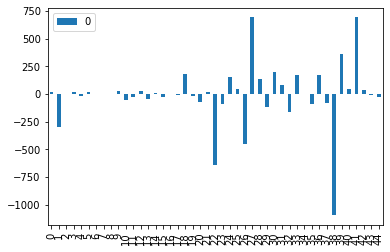

In [183]:
pd.DataFrame(linear.coef_).plot(kind = "bar")

In [172]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
test_X_poly = poly_reg.fit_transform(test_X)

In [173]:
model_fit(pol_reg, X_poly, y, test_X_poly, "model_poly_solution.csv" )

CrossValidation score =  1091.4702071700874
Train RMSE  : 1053.8491576601336


In [216]:
las = Lasso(alpha=10,normalize = True)

In [217]:
model_fit(las, X, y, test_X, "model_lasso_solution.csv" )

CrossValidation score =  1668.7857675962657
Train RMSE  : 1681.0978716484542


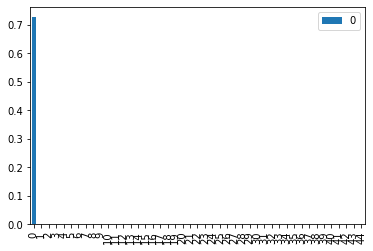

In [218]:
pd.DataFrame(las.coef_).plot(kind = "bar")

In [219]:
rid = Ridge(alpha=10,normalize = True)

In [220]:
model_fit(rid, X, y, test_X, "model_ridge_solution.csv" )

CrossValidation score =  1581.873749263396
Train RMSE  : 1581.080474150718


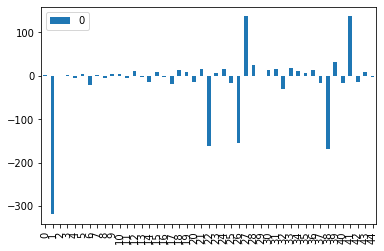

In [221]:
pd.DataFrame(rid.coef_).plot(kind = "bar")

In [213]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
clf = LassoCV(alphas=[1e-4,1e-3, 1e-2, 1e-1, 1, 10,11,23,100]).fit(X, y)
clf.score(X, y) 

0.5611580318106593

In [214]:
clf.alpha_

10.0

In [215]:
clf.alphas

[0.0001, 0.001, 0.01, 0.1, 1, 10, 11, 23, 100]

In [223]:
elastic = ElasticNet(alpha=0.4,l1_ratio=0.5)

In [224]:
model_fit(elastic, X, y, test_X, "model_elastic_solution.csv" )

CrossValidation score =  1196.0650139986878
Train RMSE  : 1194.1717650854496
